In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read the dataset
df = pd.read_csv('drive/MyDrive/body_level_classification_train.csv')
df.head()


,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [3]:
# -   Gender: Male or female.
# -   Age: Numeric value.
# -   Height: Numeric value (in meters).
# -   Weight: Numeric value (in kilograms).
# -   Fam_Hist: Does the family have a history with obesity?
# -   H_Cal_Consump: High caloric food consumption.
# -   Veg_Consump: Frequency of vegetables consumption.
# -   Meal_Count: Average number of meals per day.
# -   Food_Between_Meals: Frequency of eating between meals.
# -   Smoking: Is the person smoking?
# -   Water_Consump: Frequency of water consumption.
# -   H_Cal_Burn: Does the body have high calories burn rate?
# -   Phys_Act: How often does the person do physical activities?
# -   Time_E_Dev: How much time does person spend on electronic devices.
# -   Alcohol_Consump: Frequency of alcohols consumption.
# -   Transport: Which transports does the person usually use?
# -   Body_Level: Class of human body level.

# Distribution Of Classes

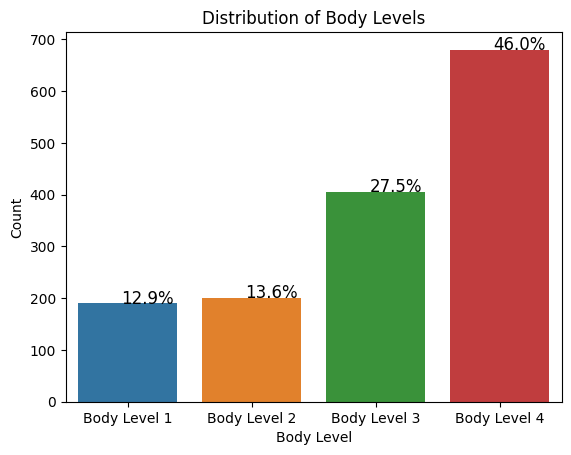

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot of the 'Body_Level' column
ax = sns.countplot(x='Body_Level', data=df)

# Calculate the percentages for each category
total = len(df['Body_Level'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

# Set the title and axis labels
ax.set_title('Distribution of Body Levels')
ax.set_xlabel('Body Level')
ax.set_ylabel('Count')

# Show the plot
plt.show()

# Encodeing Categorical Values

In [5]:
# from sklearn.preprocessing import LabelEncoder

# def encode_categorical_features(df):
#     le = LabelEncoder()
#     for col in ['Gender', 'H_Cal_Consump', 'Alcohol_Consump', 'Smoking', 'Food_Between_Meals', 'Fam_Hist', 'H_Cal_Burn','Transport','Body_Level']:
#         df[col] = le.fit_transform(df[col])
#         print(f'{col} mapping:')
#         for i, label in enumerate(le.classes_):
#             print(f'{i} -> {label}')
#     return df

# df_encoded = encode_categorical_features(df)
# for col in ['Gender', 'H_Cal_Consump', 'Alcohol_Consump', 'Smoking', 'Food_Between_Meals', 'Fam_Hist', 'H_Cal_Burn','Transport','Body_Level']:
#     unique_values = df_encoded[col].unique()
#     print(f'Unique values in column "{col}": {unique_values}')
    
def encode_categorical_features(df):
    code_value={
    "Body_Level":{"Body Level 1":1, "Body Level 2":2, "Body Level 3":3, "Body Level 4":4},
    "Gender":{"Female":0, "Male":1},
    "H_Cal_Consump":{"no":0, "yes":1},
    "Alcohol_Consump":{"no":0, "Sometimes":1, "Frequently":2, "Always":3},
    "Smoking":{"no":0, "yes":1},
    "Food_Between_Meals":{"no":0, "Sometimes":1, "Frequently":2, "Always":3},
    "Fam_Hist":{"no":0, "yes":1},
    "H_Cal_Burn":{"no":0, "yes":1},
    "Transport":{"Public_Transportation":0, "Automobile":1, "Walking":2, "Bike":3, "Motorbike":4}
    }
    for col in df.columns:
        if col in code_value:
            df[col]=df[col].map(code_value[col])
    return df

    # encode the categorical features
df_encoded = encode_categorical_features(df)

df_encoded.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,0,22.547298,1.722461,51.881263,1,2.663421,1.041110,0,0,3.000000,2,1,0,0.794402,1.391948,0,1
1,1,19.799054,1.743702,54.927529,1,2.000000,2.847264,1,0,3.289260,1,1,0,1.680844,2.000000,0,1
2,0,17.823438,1.708406,50.000000,1,1.642241,1.099231,1,0,3.452590,1,0,0,0.418875,1.000000,0,1
3,0,19.007177,1.690727,49.895716,1,1.212908,1.029703,1,0,3.207071,1,0,0,2.000000,1.000000,0,1
4,1,19.729250,1.793315,58.195150,1,2.508835,2.076933,0,0,3.435905,1,1,0,2.026668,1.443328,1,1


In [6]:
df_encoded.head()


,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,0,22.547298,1.722461,51.881263,1,2.663421,1.041110,0,0,3.000000,2,1,0,0.794402,1.391948,0,1
1,1,19.799054,1.743702,54.927529,1,2.000000,2.847264,1,0,3.289260,1,1,0,1.680844,2.000000,0,1
2,0,17.823438,1.708406,50.000000,1,1.642241,1.099231,1,0,3.452590,1,0,0,0.418875,1.000000,0,1
3,0,19.007177,1.690727,49.895716,1,1.212908,1.029703,1,0,3.207071,1,0,0,2.000000,1.000000,0,1
4,1,19.729250,1.793315,58.195150,1,2.508835,2.076933,0,0,3.435905,1,1,0,2.026668,1.443328,1,1


# Summary Statistics For Encoded Data

In [7]:
# Explore The data  # add the median value of each column to the DataFrame
df_encoded.describe()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,0.505078,24.290420,1.701602,86.542290,0.884225,2.421912,2.005120,0.728504,0.022343,2.682104,1.148274,0.817874,0.047393,1.023106,0.650672,0.308734,3.067028
std,0.500144,6.323081,0.094654,26.278277,0.320064,0.540711,0.620307,0.518055,0.147845,0.790751,0.474647,0.386079,0.212551,0.844840,0.605199,0.605540,1.052280
min,0.000000,15.000000,1.456346,39.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,19.895877,1.629194,65.000000,1.000000,2.000000,1.549931,0.000000,0.000000,2.644692,1.000000,1.000000,0.000000,0.145687,0.000000,0.000000,2.000000
50%,1.000000,22.720449,1.701284,82.636162,1.000000,2.416044,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.616045,0.000000,3.000000
75%,1.000000,26.000000,1.770278,106.690530,1.000000,3.000000,2.482933,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.672639,1.000000,1.000000,4.000000
max,1.000000,55.246250,1.980000,173.000000,1.000000,3.000000,3.000000,3.000000,1.000000,4.000000,3.000000,1.000000,1.000000,3.000000,2.000000,4.000000,4.000000


# Is there a relationship between weight and height values here?


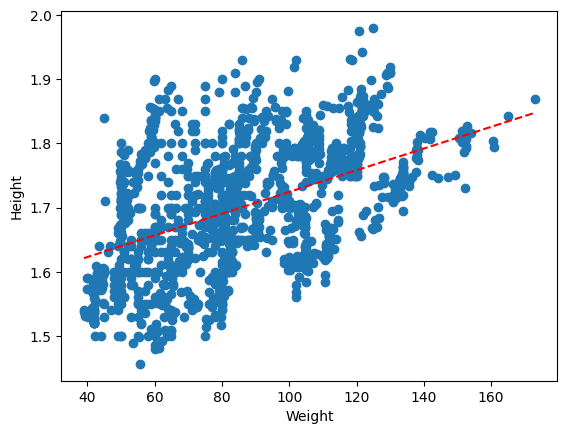

In [8]:
import numpy as np
# create a scatter plot to see if there is a relationship between weight and height
plt.scatter(df_encoded['Weight'], df_encoded['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

# fit a line to the data using polyfit
slope, intercept = np.polyfit(df['Weight'], df['Height'], 1)

# plot reference line
x_vals = [min(df['Weight']), max(df['Weight'])]
y_vals = [slope * x + intercept for x in x_vals]
plt.plot(x_vals, y_vals, '--', color='r')
plt.show()

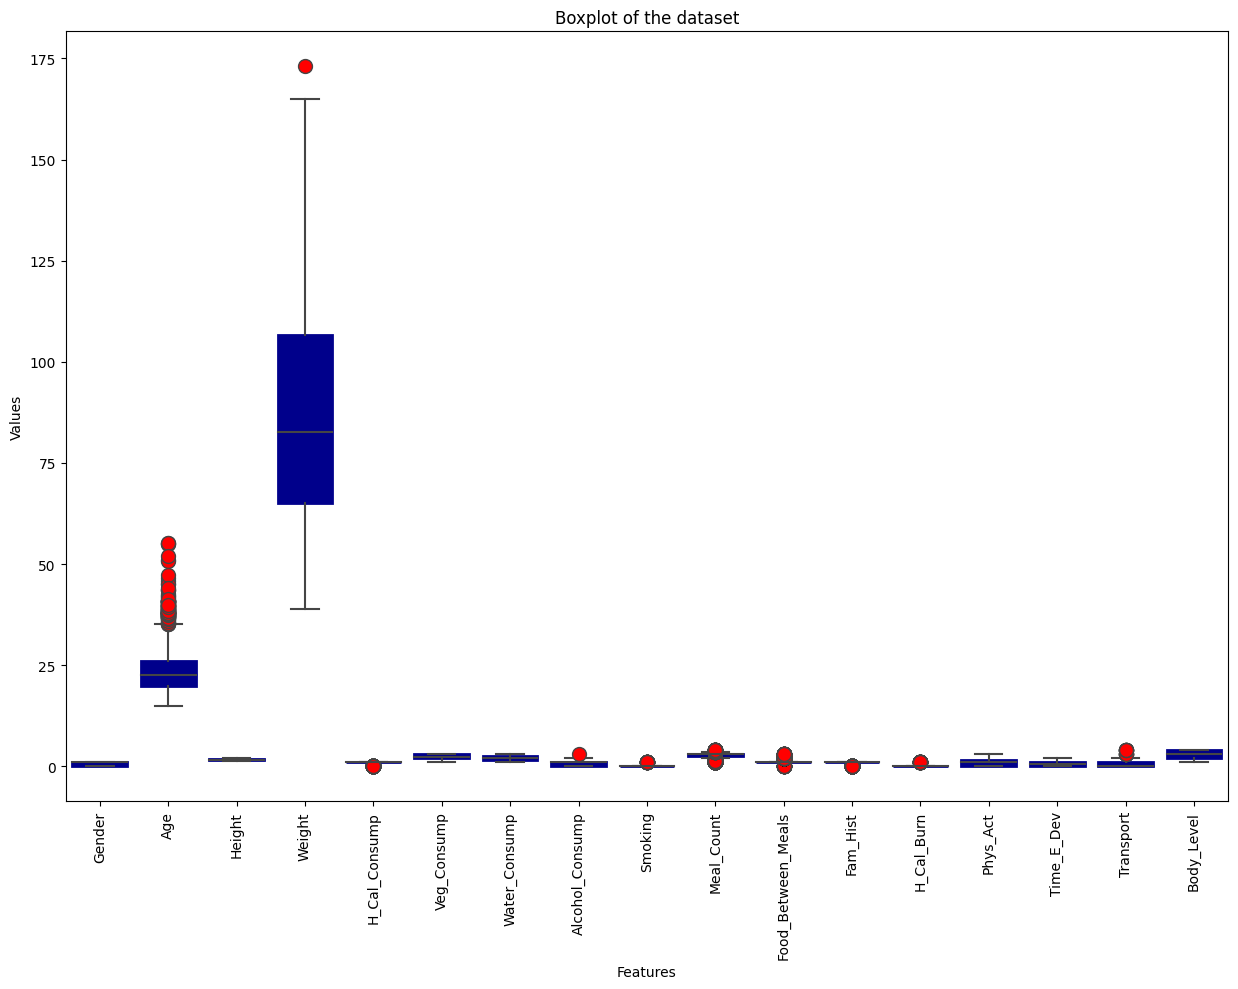

In [9]:
# create a boxplot to see if there are a lot ofoutliers in the data
plt.figure(figsize=(15,10))
plt.title('Boxplot of the dataset')
plt.xlabel('Features')
plt.ylabel('Values')
# transpose xlabel 
plt.xticks(rotation=90)
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=10, linestyle='none')
sns.boxplot(data=df_encoded, boxprops=boxprops, flierprops=flierprops)
plt.show()


# Covariance Analysis

In [10]:
import plotly.express as px

# Separate the input features from the target variable
X_cov = df.drop('Body_Level', axis=1)

# Compute the covariance matrix of the input features
cov_matrix = X_cov.cov()

# Create a list of column names to use as labels
labels = list(X_cov.columns)

# Create a heatmap figure with hover information
fig = px.imshow(cov_matrix,
                x=labels,
                y=labels,
                color_continuous_scale='RdBu',
                zmax=1.0,
                zmin=-1.0,
                title='Covariance Matrix with Hover Information')
fig.update_layout(
    xaxis=dict(tickangle=90),
    yaxis=dict(tickangle=0),
    height=800,
    width=800,
    font=dict(size=12),
    coloraxis_colorbar=dict(title='Covariance'),
    title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top')
)
fig.update_traces(
    hovertemplate='<b>%{x}</b><br><b>%{y}</b><br>Covariance: %{z:.2f}<extra></extra>'
)
fig.show()

# Explore Age Column

In [11]:
# bin Age column into intervals and count observations in each interval
age_ranges = pd.cut(df['Age'], bins=[14, 20, 30, 40,50,60])
count_by_age_range = age_ranges.value_counts()

# print result
for i, count in enumerate(count_by_age_range):
    print(f'({count_by_age_range.index[i].left}-{count_by_age_range.index[i].right}) years -> count of {count}')

(20-30) years -> count of 818
(14-20) years -> count of 409
(30-40) years -> count of 212
(40-50) years -> count of 31
(50-60) years -> count of 7


In [12]:
# mean weight of each class
df_encoded.groupby('Body_Level')['Weight'].mean()

Body_Level
1     50.116519
2     61.797512
3     78.021020
4    109.122043
Name: Weight, dtype: float64

In [13]:
# mean wigth of for each gender
df_encoded.groupby('Gender')['Weight'].mean()

Gender
0    81.776805
1    91.211954
Name: Weight, dtype: float64

In [14]:
# mean height of each gender
df_encoded.groupby('Gender')['Height'].mean()

Gender
0    1.641940
1    1.760065
Name: Height, dtype: float64

# Skewness of data

In [15]:
# Check if any of the features are skewed 
# a value close to zero indicates that the feature is normally distributed

# Gender mapping:
# 0 -> Female
# 1 -> Male

# H_Cal_Consump mapping:
# 0 -> no
# 1 -> yes

# Alcohol_Consump mapping:
# 0 -> Always
# 1 -> Frequently
# 2 -> Sometimes
# 3 -> no

# Smoking mapping:
# 0 -> no
# 1 -> yes

# Food_Between_Meals mapping:
# 0 -> Always
# 1 -> Frequently
# 2 -> Sometimes
# 3 -> no

# Fam_Hist mapping:
# 0 -> no
# 1 -> yes

# H_Cal_Burn mapping:
# 0 -> no
# 1 -> yes

# Transport mapping:
# 0 -> Automobile
# 1 -> Bike
# 2 -> Motorbike
# 3 -> Public_Transportation
# 4 -> Walking

df_encoded.skew(numeric_only=True)

Gender               -0.020333
Age                   1.481576
Height               -0.026199
Weight                0.263981
H_Cal_Consump        -2.404184
Veg_Consump          -0.482316
Water_Consump        -0.100632
Alcohol_Consump      -0.208836
Smoking               6.470351
Meal_Count           -1.059333
Food_Between_Meals    1.866960
Fam_Hist             -1.648912
H_Cal_Burn            4.264585
Phys_Act              0.464398
Time_E_Dev            0.635904
Transport             2.588752
Body_Level           -0.797732
dtype: float64

#### Skewness output show that most of the people in the dataset with H_Cal_Consump,low physical activity,not walking regularly, and rarely engaged in H_Cal_Burn which are consistent with a lot of people in this dataset in class4 with high mean value of weight

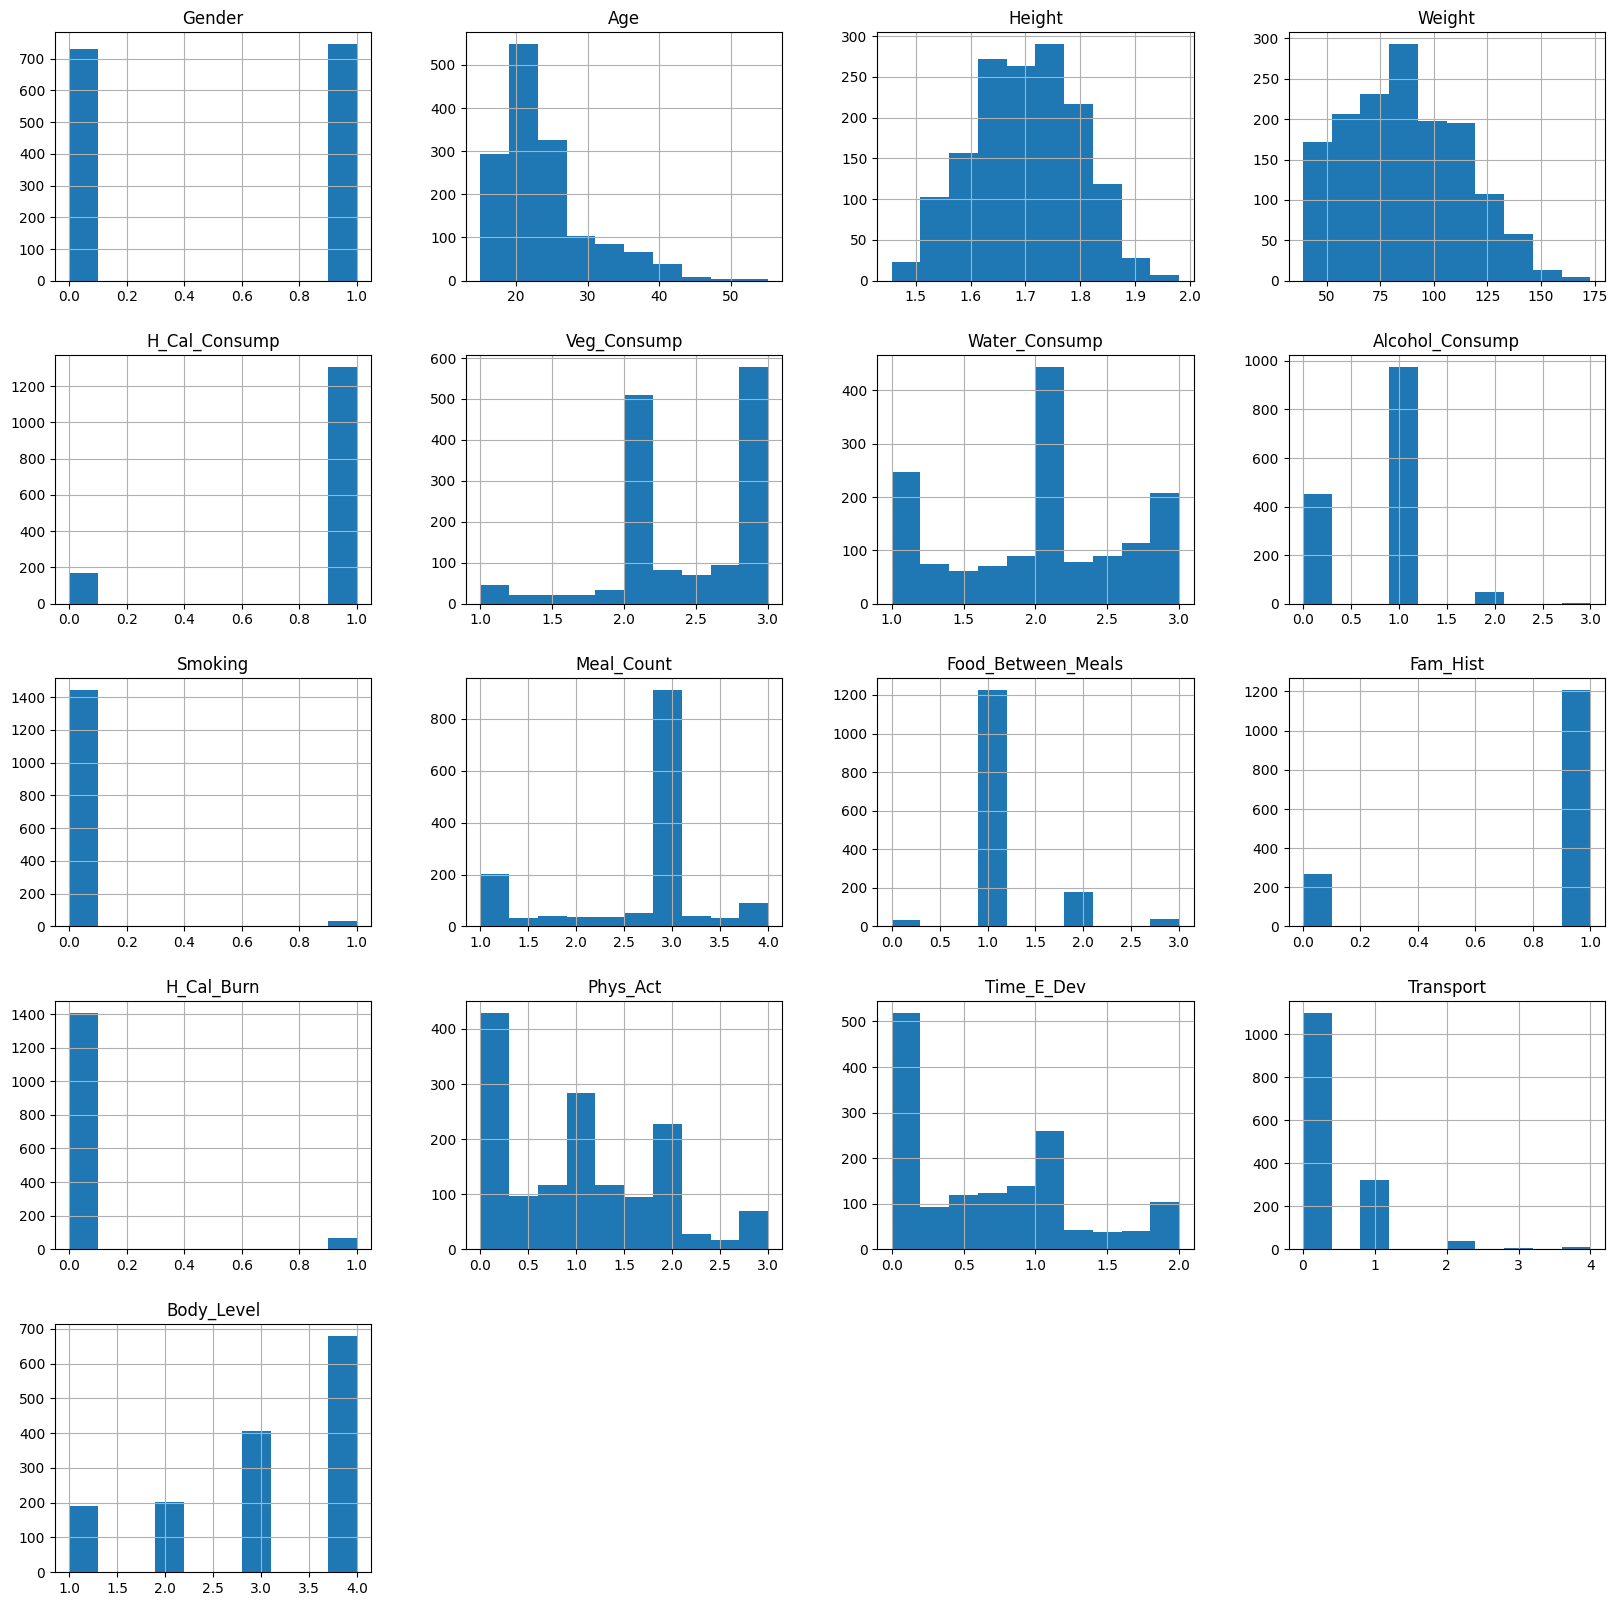

In [16]:
# visualize the distribution of the features using a histogram within each class
df_encoded.hist(figsize=(20, 20))
plt.show()
    

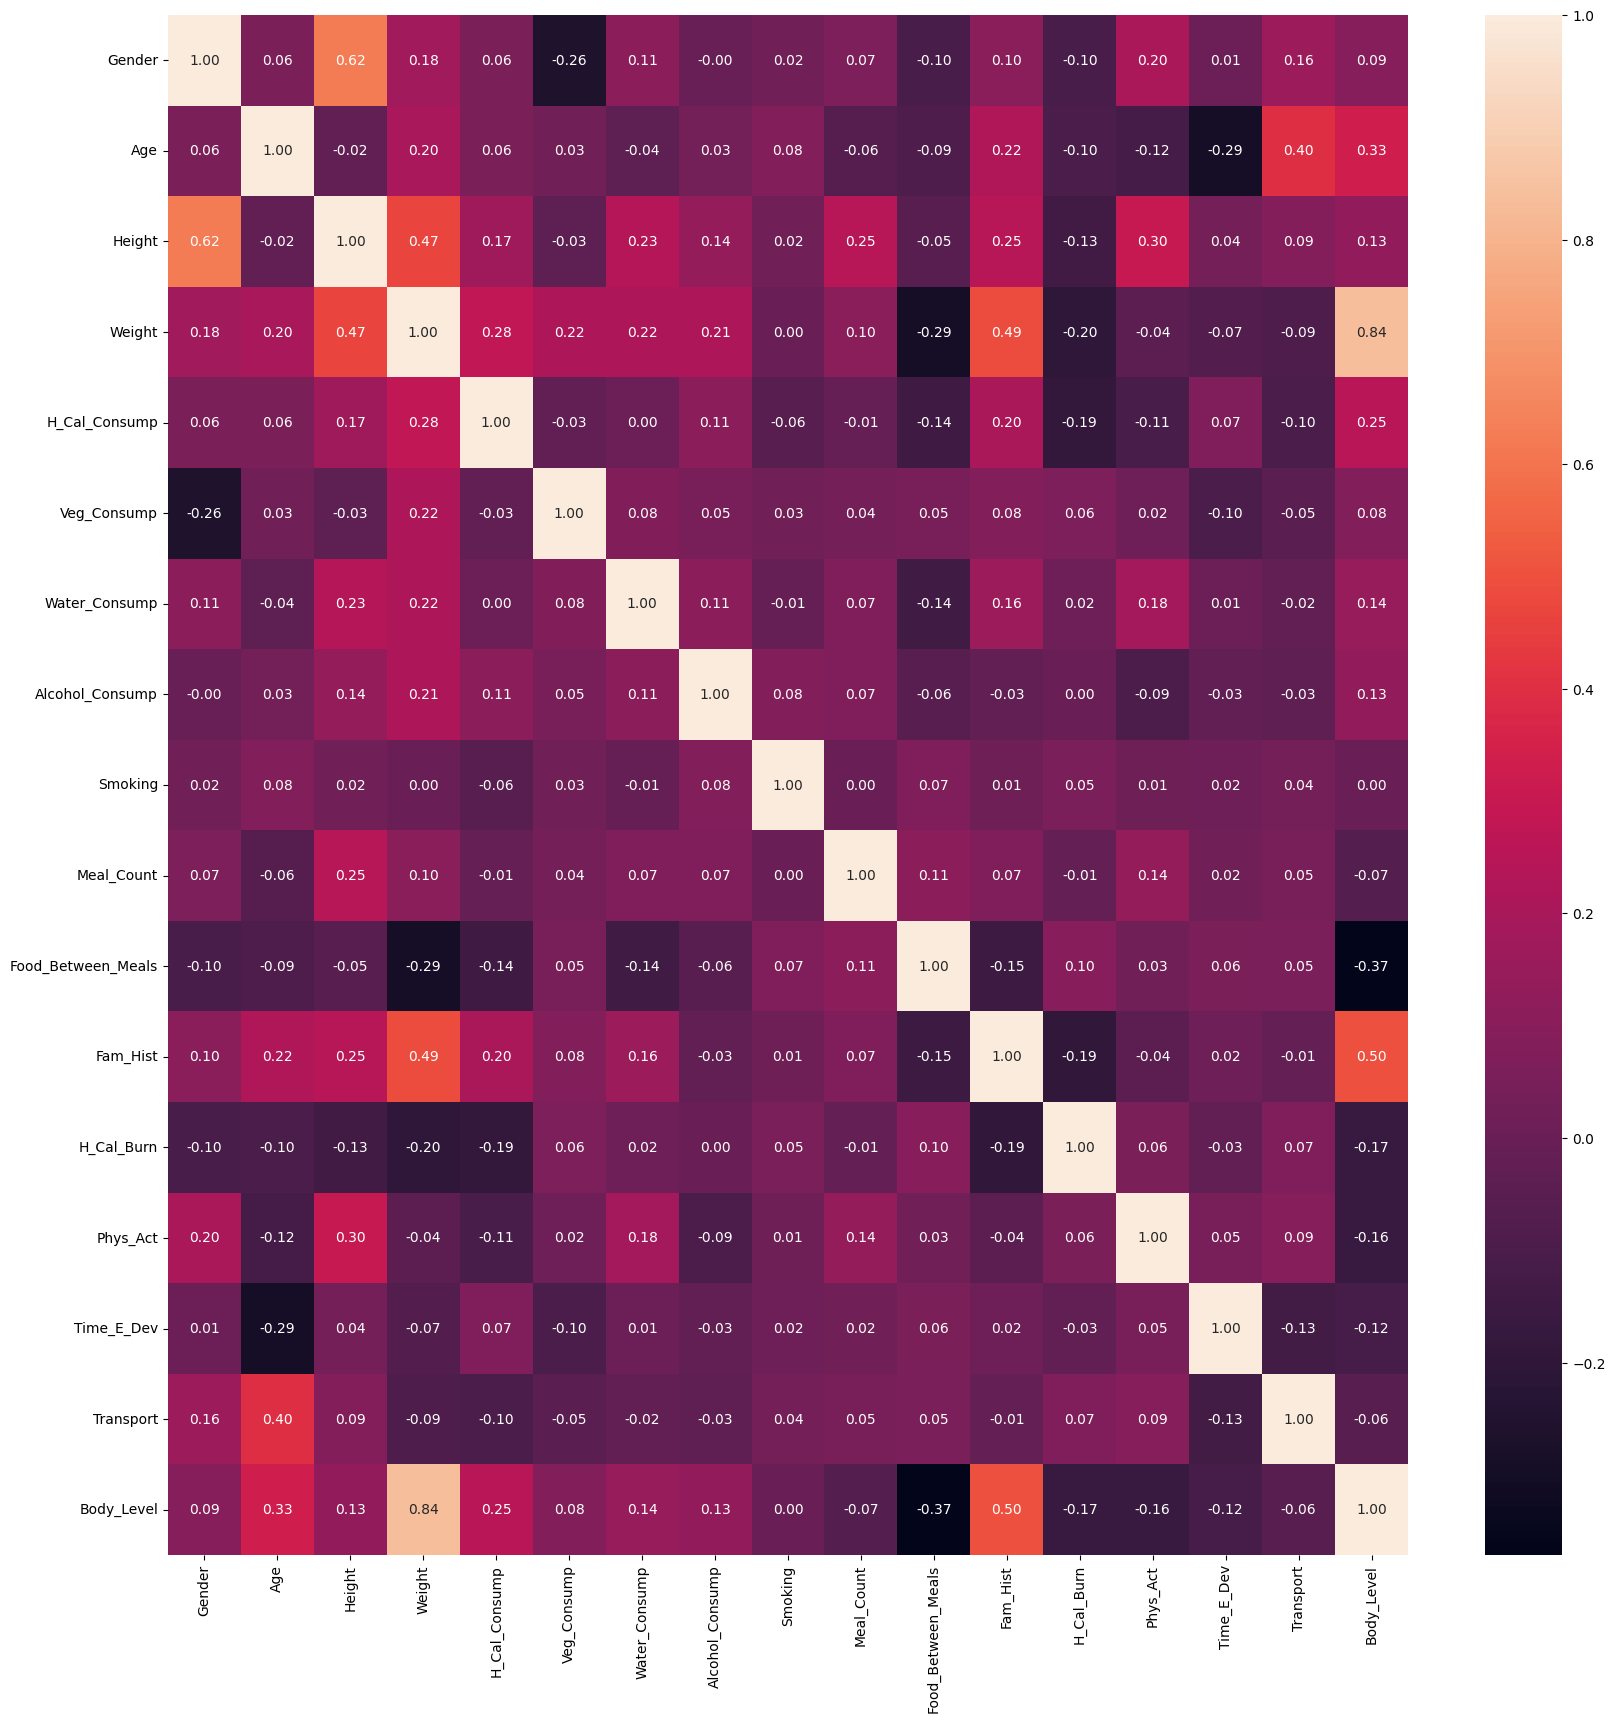

In [17]:
# Exploring the data 
# visualize the correlation between the features

# add BMI to the DataFrame
df_encoded_with_BMI = df_encoded.copy()
df_encoded_with_BMI['BMI'] = df_encoded['Weight'] / (df_encoded['Height']) ** 2


plt.figure(figsize=(20, 20))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f')
plt.show()



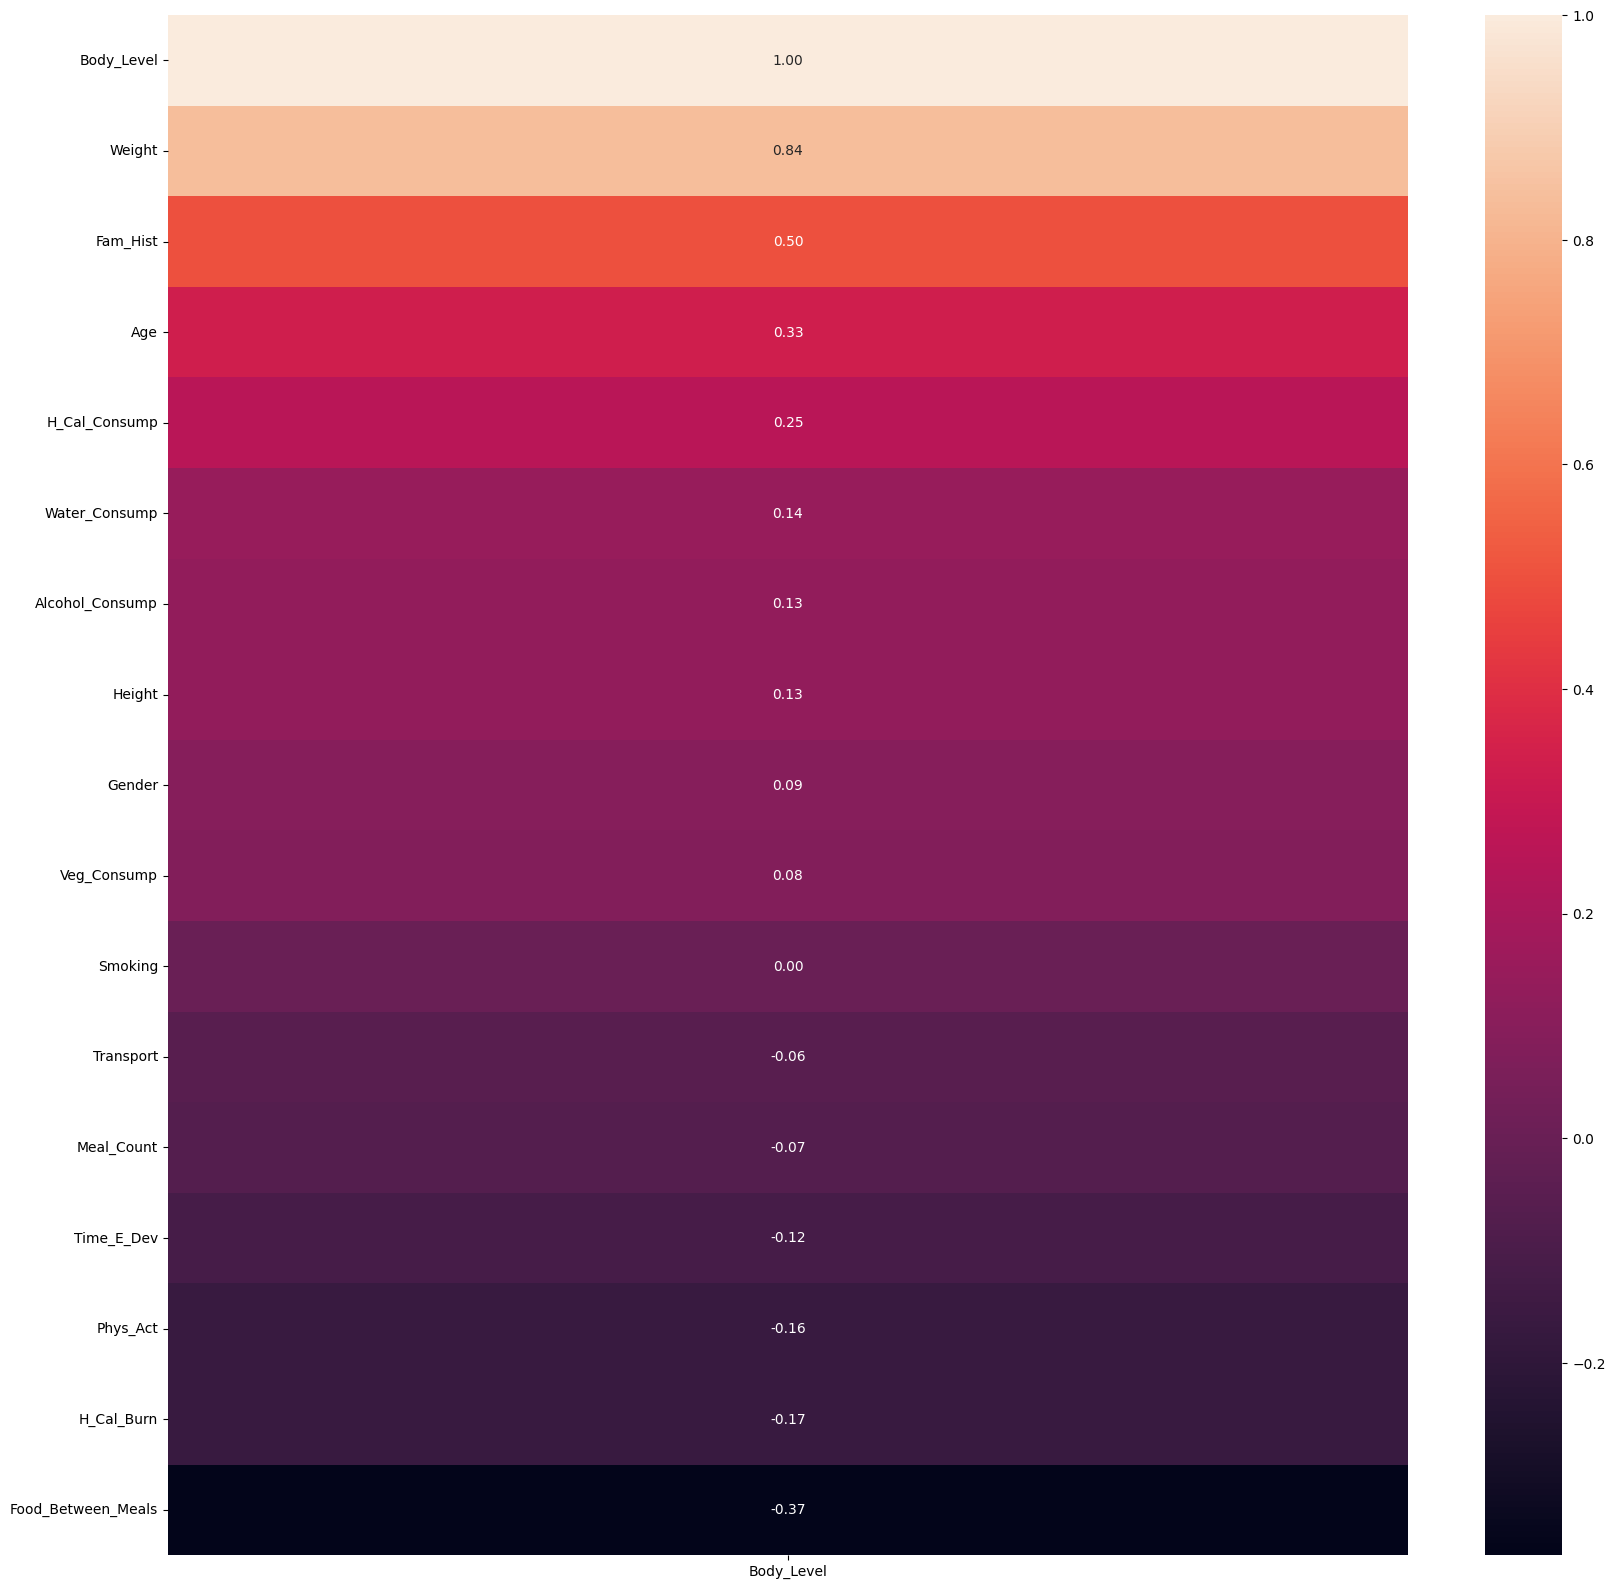

In [18]:
# visualize the correlation between the features and the target variable
plt.figure(figsize=(20, 20))
sns.heatmap(df_encoded.corr()[['Body_Level']].sort_values(by='Body_Level', ascending=False), annot=True, fmt='.2f')
plt.show()

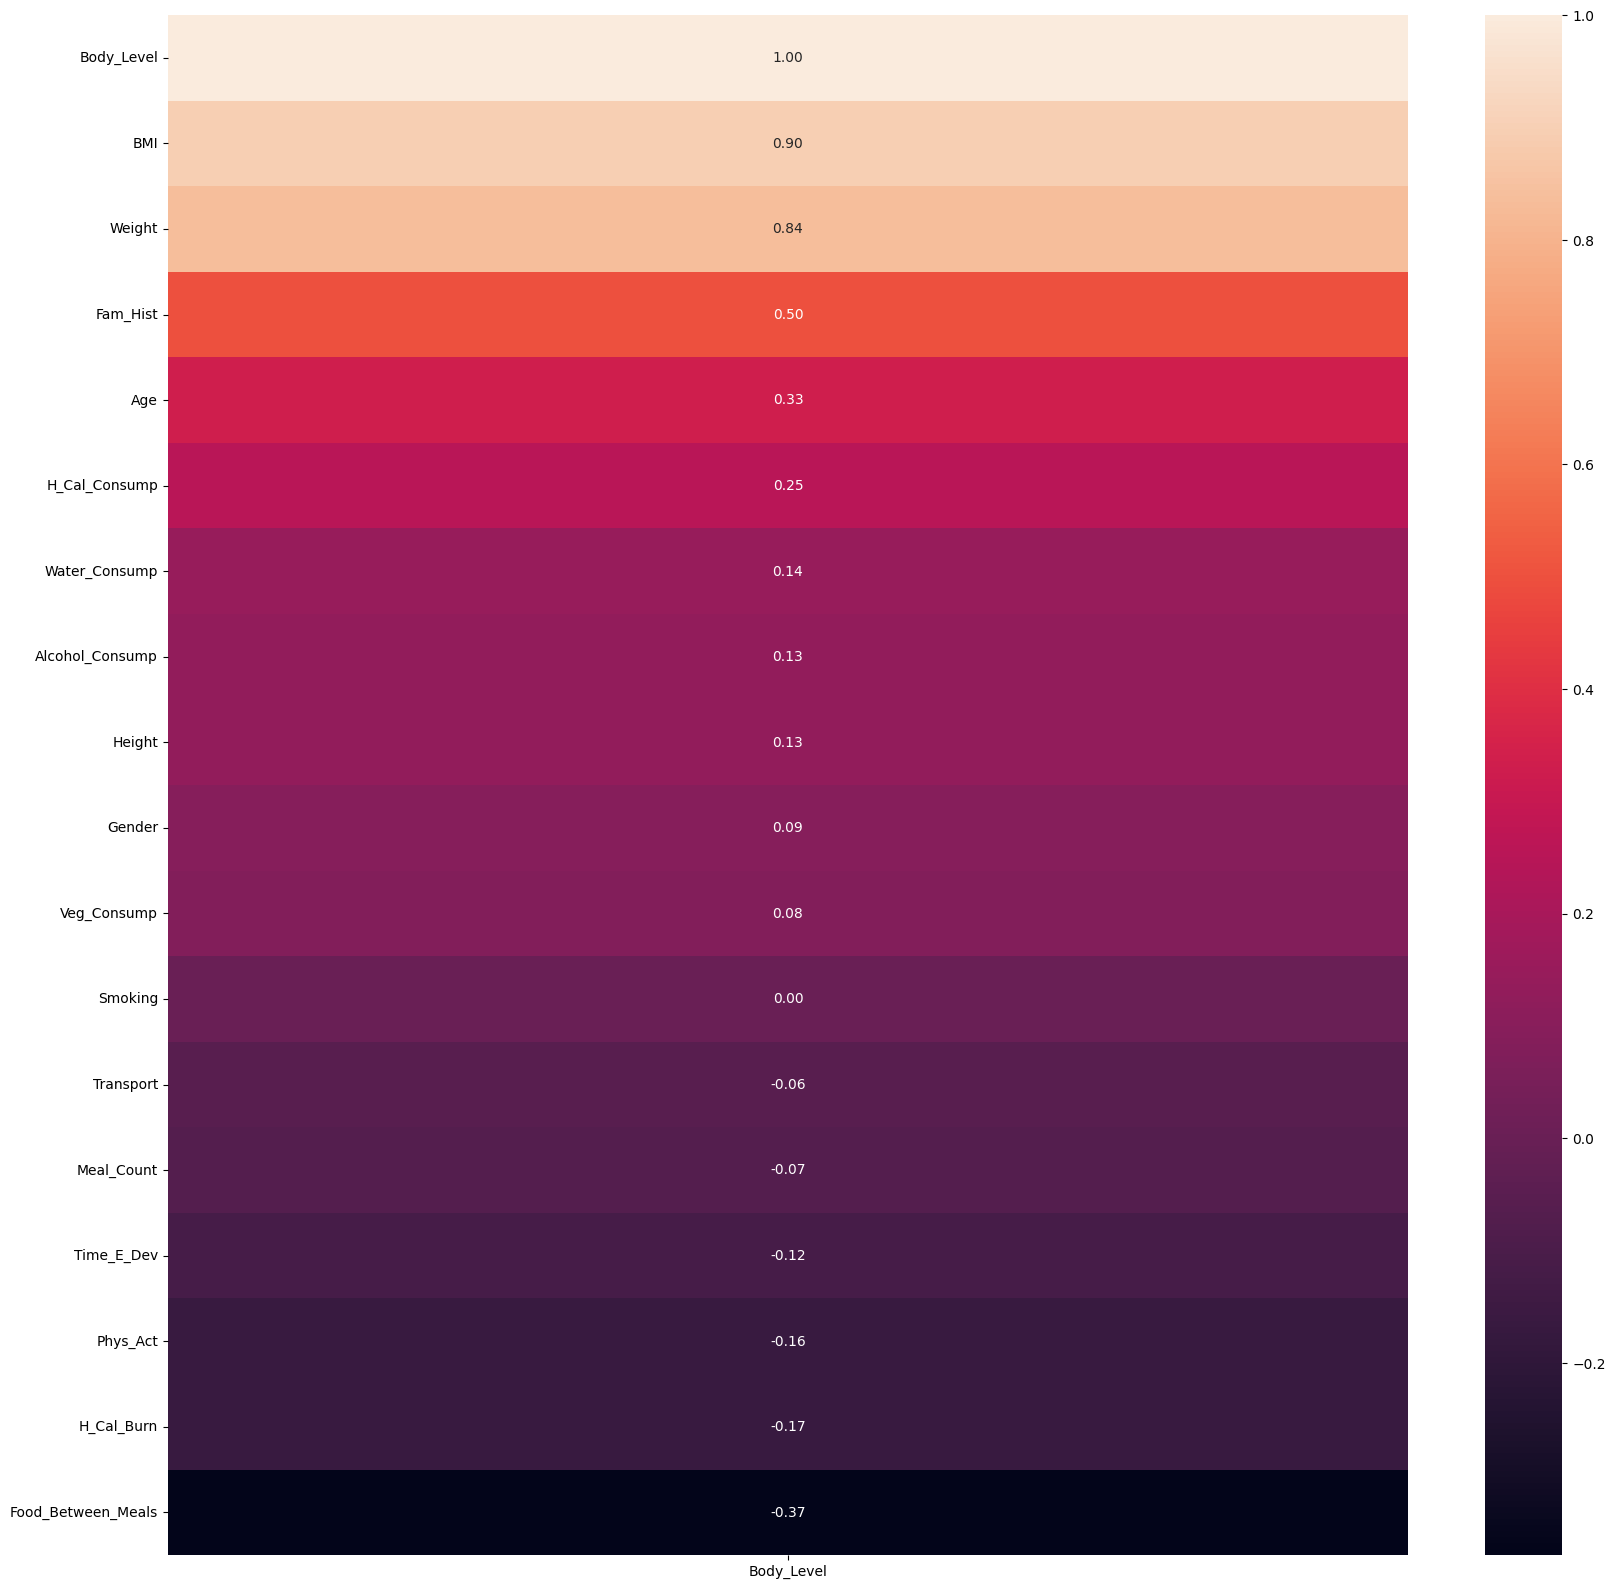

In [19]:
# visualize the correlation between the features and the target variable
plt.figure(figsize=(20, 20))
sns.heatmap(df_encoded_with_BMI.corr()[['Body_Level']].sort_values(by='Body_Level', ascending=False), annot=True, fmt='.2f')
plt.show()

# Split the dataset

Train set
4    0.460497
3    0.274643
2    0.136193
1    0.128668
Name: Body_Level, dtype: float64
Test set
4    0.459459
3    0.277027
2    0.135135
1    0.128378
Name: Body_Level, dtype: float64


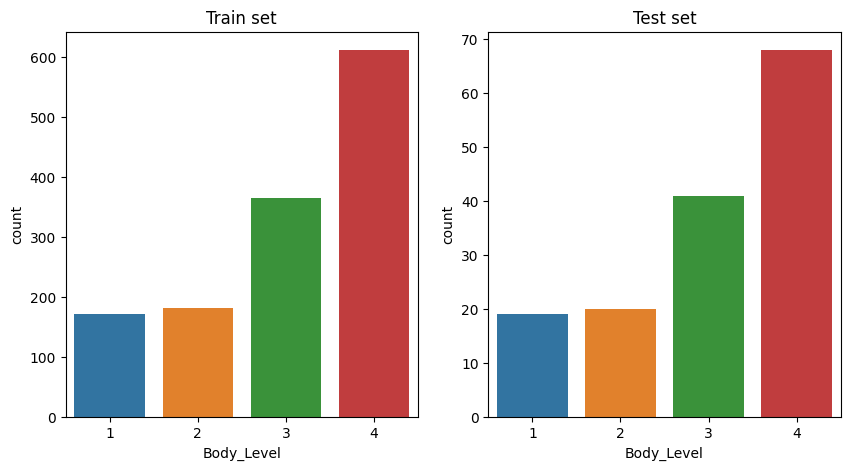

In [137]:
X = df_encoded.drop('Body_Level', axis=1)
y = df_encoded['Body_Level']


# split unbalanced data into train and test sets using stratification sampling
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
# check the distribution of the classes in the train and test sets
print('Train set')
print(y_train.value_counts(normalize=True))

print('Test set')
print(y_test.value_counts(normalize=True))


# Visualize the distribution of the classes in the train and test sets
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(x=y_test, ax=ax[1])
ax[1].set_title('Test set')
plt.show()
    
    

# Helper Functions for ML Models Training and testing

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def train_model(model, X_train, y_train):
    # train the model
    model.fit(X_train, y_train)

    # return the trained model
    return model

def predict(model, X_test, y_test):
    # make predictions using the trained model
    y_pred = model.predict(X_test)

    # return the predictions
    return y_pred

def evaluate_model(y_test, y_pred):
    # calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # calculate the precision score
    precision = precision_score(y_test, y_pred, average='weighted')

    # calculate the recall score
    recall = recall_score(y_test, y_pred, average='weighted')

    # calculate the f1 score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # return the evaluation metrics
    return accuracy, precision, recall, f1

In [139]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# IMPORT BAGGED DESCISION TREE
from sklearn.ensemble import BaggingClassifier

In [140]:
# Apply OVERSAMPLING to the training data
from imblearn.over_sampling import BorderlineSMOTE,ADASYN

def blsmote(X_train, y_train):
    # create an instance of BorderlineSMOTE
    sm = BorderlineSMOTE(random_state=42)

    # fit the training data to the SMOTE instance
    X_train_blsmote, y_train_blsmote = sm.fit_resample(X_train, y_train)

    # return the oversampled data
    return X_train_blsmote, y_train_blsmote



def adasyn(X_train, y_train):
    # create an instance of ADASYN
    sm = ADASYN(random_state=42)

    # fit the training data to the ADASYN instance
    X_train_adasyn, y_train_adasyn = sm.fit_resample(X_train, y_train)

    # return the oversampled data
    return X_train_adasyn, y_train_adasyn

import pandas as pd

def run(X_, y_, X_test, y_test, models):
    # create a list to store the accuracy scores for training and test sets
    accuracy_scores_train = []
    accuracy_scores_test = []

    # create a list to store the precision scores for training and test sets
    precision_scores_train = []
    precision_scores_test = []

    # create a list to store the recall scores for training and test sets
    recall_scores_train = []
    recall_scores_test = []

    # create a list to store the f1 scores for training and test sets
    f1_scores_train = []
    f1_scores_test = []

    # loop over the models
    for model in models:
        # train the model on the oversampled training data
        trained_model = train_model(model, X_, y_)

        # make predictions on the training and test sets
        y_pred_train = predict(trained_model, X_, y_)
        y_pred_test = predict(trained_model, X_test, y_test)

        # evaluate the model on the training set
        accuracy_train, precision_train, recall_train, f1_train = evaluate_model(y_, y_pred_train)

        # evaluate the model on the test set
        accuracy_test, precision_test, recall_test, f1_test = evaluate_model(y_test, y_pred_test)

        # append the accuracy scores to accuracy_scores_train and accuracy_scores_test
        accuracy_scores_train.append(accuracy_train)
        accuracy_scores_test.append(accuracy_test)

        # append the precision scores to precision_scores_train and precision_scores_test
        precision_scores_train.append(precision_train)
        precision_scores_test.append(precision_test)

        # append the recall scores to recall_scores_train and recall_scores_test
        recall_scores_train.append(recall_train)
        recall_scores_test.append(recall_test)

        # append the f1 scores to f1_scores_train and f1_scores_test
        f1_scores_train.append(f1_train)
        f1_scores_test.append(f1_test)

    # create a DataFrame to store the evaluation metrics
    df_scores = pd.DataFrame({
        'Model': models,
        # 'Train Accuracy': accuracy_scores_train,
        # 'Test Accuracy': accuracy_scores_test,
        # 'Train Precision': precision_scores_train,
        # 'Test Precision': precision_scores_test,
        # 'Train Recall': recall_scores_train,
        # 'Test Recall': recall_scores_test,
        'Train F1': f1_scores_train,
        'Test F1': f1_scores_test
    })

    # sort the DataFrame by the test F1 score in descending order
    df_scores = df_scores.sort_values(by='Test F1', ascending=False)

    # return the evaluation DataFrame
    return df_scores
    
    


In [141]:
X_train_blsmote, y_train_blsmote = blsmote(X_train, y_train)
X_train_adasyn, y_train_adasyn = adasyn(X_train, y_train)

In [142]:
# Grid Search for the BaggingClassifier model
from sklearn.model_selection import GridSearchCV

def tune_params(X_,y_,model,hyperparameters,cv=5,verbose=1):
  # create a GridSearchCV instance
  grid = GridSearchCV(model, hyperparameters, cv=cv, verbose=verbose,return_train_score=True,scoring='f1_macro')

  # train the model
  grid.fit(X_, y_)

  best_model = grid.best_estimator_
  params = grid.cv_results_['params']
  mean_test_scores = grid.cv_results_['mean_test_score']
  return best_model,params,mean_test_scores



In [143]:
# create a list of hyperparameters
bg_hyperparameters = {
    'n_estimators': [30, 40, 50,100,140],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9]
}
bagging = BaggingClassifier(random_state=42)
best_bagging_classifier_normal_data,bg_normal_params,bg_normal_scores = tune_params(X_train,y_train,bagging,bg_hyperparameters)


Fitting 5 folds for each of 125 candidates, totalling 625 fits


In [144]:
best_bagging_classifier_normal_data

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=100,
                  random_state=42)

In [145]:
import plotly.express as px
import pandas as pd

def visualize_hyperparams_effect(params, scores, x, y, c):
    scores = np.nan_to_num(scores)
    # Create a DataFrame that includes the hyperparameter values and accuracy scores
    data = pd.DataFrame({
        x: [p[x] for p in params],
        y: [p[y] for p in params],
        c: [p[c] for p in params],
        'Score': scores
    })
    # Determine the range of values for the color parameter
    c_min = min(data[c])
    c_max = max(data[c])
    # Create a color scale that maps the range of values to a specific color
    color_scale = [[i / 10.0, f'rgb({255 - i*255//10}, {i*255//10}, 0)'] for i in range(11)] 
    # Create a scatter plot
    fig = px.scatter(data, x=x, y=y, color='Score', size=c, color_continuous_scale=color_scale, range_color=[0, 1])
    fig.update_layout(
        title='Effect of Hyperparameters on Accuracy',
        xaxis_title=x,
        yaxis_title=y,
        coloraxis_colorbar=dict(title='Accuracy')
    )
    fig.show()

In [146]:
visualize_hyperparams_effect(bg_normal_params,bg_normal_scores,x='max_samples',y='max_features',c='n_estimators')

In [147]:
lg_hyperparameters = {'penalty': ['l1', 'l2'], 
                   'C': [1e-5,0.01, 0.1, 1.0, 10.0, 100.0],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lg = LogisticRegression(random_state=42)
best_logistic_regression_normal_data,lg_normal_params,lg_normal_scores =  tune_params(X_train,y_train,lg,lg_hyperparameters)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

In [148]:
best_logistic_regression_normal_data

LogisticRegression(C=100.0, random_state=42, solver='newton-cg')

In [149]:
visualize_hyperparams_effect(lg_normal_params,lg_normal_scores,x='solver',y='penalty',c='C')

In [150]:

# create a list of models
models = [
    best_logistic_regression_normal_data,
    # SVC(),
    best_bagging_classifier_normal_data,
]
df_scores = run(X_train, y_train, X_test, y_test, models)

# find the index of the Bagging Classifier and Logistic Regression rows in df_scores
bc_index = df_scores[(df_scores['Model'] == best_bagging_classifier_normal_data)].index[0]
lr_index = df_scores[(df_scores['Model'] == best_logistic_regression_normal_data) ].index[0]

# find the index of the best model in grid search results
best_bg_index = np.argmax(bg_normal_scores)

# get the CV score of the best model
best_bg_cv_score = bg_normal_scores[best_bg_index]


lg_normal_scores = np.nan_to_num(lg_normal_scores)
# find the index of the best model in grid search results
best_lg_index = np.argmax(lg_normal_scores)
# get the CV score of the best model
best_lg_cv_score = lg_normal_scores[best_lg_index]

# add the Bagging Classifier scores to the df_scores row for the Normal Test dataset
df_scores.loc[bc_index, ['CV f1']] = best_bg_cv_score

# add the Logistic Regression scores to the df_scores row for the Normal Test dataset
df_scores.loc[lr_index, ['CV f1']] = best_lg_cv_score

df_scores.head()



,Model,Train F1,Test F1,CV f1
0,"LogisticRegression(C=100.0, random_state=42, s...",0.982576,0.979766,0.950202
1,(DecisionTreeClassifier(random_state=195292617...,1.000000,0.979155,0.959473


In [151]:
# create a list of hyperparameters
bg_hyperparameters = {
    'n_estimators': [30, 40, 50,100,140],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9]
}
bagging = BaggingClassifier(random_state=42)
best_bagging_classifier_blsmote_data,bg_blsmote_params,bg_blsmote_scores = tune_params(X_train_blsmote,y_train_blsmote,bagging,bg_hyperparameters)

lg_hyperparameters = {'penalty': ['l1', 'l2'], 
                   'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lg = LogisticRegression(random_state=42)
best_logistic_regression_blsmote_data,lg_blsmote_params,lg_blsmote_scores =  tune_params(X_train_blsmote,y_train_blsmote,lg,lg_hyperparameters)


Fitting 5 folds for each of 125 candidates, totalling 625 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

In [152]:
best_bagging_classifier_blsmote_data

BaggingClassifier(max_features=0.8, max_samples=0.7, n_estimators=100,
                  random_state=42)

In [153]:
visualize_hyperparams_effect(bg_blsmote_params,bg_blsmote_scores,x='max_samples',y='max_features',c='n_estimators')

In [154]:
best_logistic_regression_blsmote_data

LogisticRegression(C=100.0, random_state=42, solver='newton-cg')

In [155]:
visualize_hyperparams_effect(lg_blsmote_params,lg_blsmote_scores,x='solver',y='penalty',c='C')

In [156]:

# create a list of models
models = [
    best_logistic_regression_blsmote_data,
    # SVC(),
    best_bagging_classifier_blsmote_data,
]
df_scores = run(X_train_blsmote, y_train_blsmote, X_test, y_test, models)

# find the index of the Bagging Classifier and Logistic Regression rows in df_scores
bc_index = df_scores[(df_scores['Model'] == best_bagging_classifier_blsmote_data)].index[0]
lr_index = df_scores[(df_scores['Model'] == best_logistic_regression_blsmote_data) ].index[0]

# find the index of the best model in grid search results
best_bg_index = np.argmax(bg_blsmote_scores)

# get the CV score of the best model
best_bg_cv_score = bg_blsmote_scores[best_bg_index]


lg_blsmote_scores = np.nan_to_num(lg_blsmote_scores)
# find the index of the best model in grid search results
best_lg_index = np.argmax(lg_blsmote_scores)
# get the CV score of the best model
best_lg_cv_score = lg_blsmote_scores[best_lg_index]

# add the Bagging Classifier scores to the df_scores row for the Normal Test dataset
df_scores.loc[bc_index, ['CV f1']] = best_bg_cv_score

# add the Logistic Regression scores to the df_scores row for the Normal Test dataset
df_scores.loc[lr_index, ['CV f1']] = best_lg_cv_score


df_scores.head()

,Model,Train F1,Test F1,CV f1
0,"LogisticRegression(C=100.0, random_state=42, s...",0.994274,0.986502,0.980818
1,(DecisionTreeClassifier(random_state=195292617...,1.000000,0.972423,0.980498


In [157]:
# create a list of hyperparameters
bg_hyperparameters = {
    'n_estimators': [30, 40, 50,100,140],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9]
}
bagging = BaggingClassifier(random_state=42)
best_bagging_classifier_adasyn_data,bg_adasyn_params,bg_adasyn_scores = tune_params(X_train_adasyn,y_train_adasyn,bagging,bg_hyperparameters)

lg_hyperparameters = {'penalty': ['l1', 'l2', 'elasticnet'], 
                   'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lg = LogisticRegression(random_state=42)
best_logistic_regression_adasyn_data,lg_adasyn_params,lg_adasyn_scores =  tune_params(X_train_adasyn,y_train_adasyn,lg,lg_hyperparameters)


Fitting 5 folds for each of 125 candidates, totalling 625 fits
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

In [158]:
best_bagging_classifier_adasyn_data

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=50,
                  random_state=42)

In [159]:
best_logistic_regression_adasyn_data

LogisticRegression(C=100.0, random_state=42, solver='newton-cg')

In [160]:
# create a list of models
models = [
    best_bagging_classifier_adasyn_data,
    # SVC(),
    best_logistic_regression_adasyn_data,
]
df_scores = run(X_train_adasyn, y_train_adasyn, X_test, y_test, models)


# find the index of the Bagging Classifier and Logistic Regression rows in df_scores
bc_index = df_scores[(df_scores['Model'] == best_bagging_classifier_adasyn_data)].index[0]
lr_index = df_scores[(df_scores['Model'] == best_logistic_regression_adasyn_data) ].index[0]

# find the index of the best model in grid search results
best_bg_index = np.argmax(bg_adasyn_scores)

# get the CV score of the best model
best_bg_cv_score = bg_adasyn_scores[best_bg_index]


lg_adasyn_scores = np.nan_to_num(lg_adasyn_scores)
# find the index of the best model in grid search results
best_lg_index = np.argmax(lg_adasyn_scores)
# get the CV score of the best model
best_lg_cv_score = lg_adasyn_scores[best_lg_index]

# add the Bagging Classifier scores to the df_scores row for the Normal Test dataset
df_scores.loc[bc_index, ['CV f1']] = best_bg_cv_score

# add the Logistic Regression scores to the df_scores row for the Normal Test dataset
df_scores.loc[lr_index, ['CV f1']] = best_lg_cv_score

df_scores.head()

,Model,Train F1,Test F1,CV f1
1,"LogisticRegression(C=100.0, random_state=42, s...",0.991494,0.986502,0.984677
0,(DecisionTreeClassifier(random_state=195292617...,1.000000,0.986486,0.991183


Train set
4    0.460497
3    0.274643
2    0.136193
1    0.128668
Name: Body_Level, dtype: float64
Test set
4    0.459459
3    0.277027
2    0.135135
1    0.128378
Name: Body_Level, dtype: float64


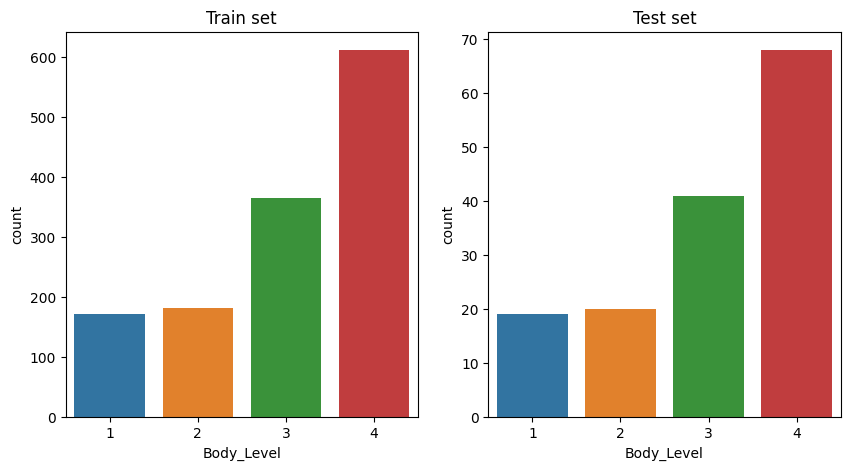

In [161]:
X = df_encoded_with_BMI.drop('Body_Level', axis=1)
y = df_encoded_with_BMI['Body_Level']


# split unbalanced data into train and test sets using stratification sampling
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

X_train_BMI, X_test_BMI, y_train_BMI, y_test_BMI = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
# check the distribution of the classes in the train and test sets
print('Train set')
print(y_train_BMI.value_counts(normalize=True))

print('Test set')
print(y_test_BMI.value_counts(normalize=True))


# Visualize the distribution of the classes in the train and test sets
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(x=y_test, ax=ax[1])
ax[1].set_title('Test set')
plt.show()
    
    

In [162]:
# create a list of hyperparameters
bg_hyperparameters = {
    'n_estimators': [30, 40, 50,100,140],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9]
}
bagging = BaggingClassifier(random_state=42)
best_bagging_classifier_normal_data_with_bmi,bg_normal_bmi,bg_bmi_scores = tune_params(X_train_BMI,y_train_BMI,bagging,bg_hyperparameters)

lg_hyperparameters = {'penalty': ['l1', 'l2', 'elasticnet'], 
                   'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lg = LogisticRegression(random_state=42)
best_logistic_regression_normal_data_with_bmi,lg_normal_bmi,lg_bmi_scores =  tune_params(X_train_BMI,y_train_BMI,lg,lg_hyperparameters)


Fitting 5 folds for each of 125 candidates, totalling 625 fits
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

In [163]:
best_bagging_classifier_normal_data_with_bmi

BaggingClassifier(max_features=0.5, max_samples=0.8, n_estimators=140,
                  random_state=42)

In [164]:
best_logistic_regression_normal_data_with_bmi

LogisticRegression(random_state=42, solver='newton-cg')

In [165]:
visualize_hyperparams_effect(bg_normal_bmi,bg_bmi_scores,x='max_samples',y='max_features',c='n_estimators')

In [166]:
visualize_hyperparams_effect(lg_normal_bmi,lg_bmi_scores,x='solver',y='penalty',c='C')

In [167]:
dcs_hyperparameters = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}
dtc = DecisionTreeClassifier(random_state=42)
best_dtc_normal_data_BMI,dtc_bmi_params,dtc_bmi_scores = tune_params(X_train_BMI,y_train_BMI,dtc,dcs_hyperparameters)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


In [168]:

# create a list of models
models = [
    best_bagging_classifier_normal_data_with_bmi,
    # SVC(),
    best_logistic_regression_normal_data_with_bmi,
    best_dtc_normal_data_BMI
]
df_scores_bmi = run(X_train_BMI, y_train_BMI, X_test_BMI, y_test_BMI, models)

# find the index of the Bagging Classifier and Logistic Regression rows in df_scores
bc_index = df_scores_bmi[(df_scores_bmi['Model'] == best_bagging_classifier_normal_data_with_bmi)].index[0]
lr_index = df_scores_bmi[(df_scores_bmi['Model'] == best_logistic_regression_normal_data_with_bmi) ].index[0]

# find the index of the best model in grid search results
best_bg_index = np.argmax(bg_bmi_scores)

# get the CV score of the best model
best_bg_cv_score = bg_bmi_scores[best_bg_index]


lg_bmi_scores = np.nan_to_num(lg_bmi_scores)
# find the index of the best model in grid search results
best_lg_index = np.argmax(lg_bmi_scores)
# get the CV score of the best model
best_lg_cv_score = lg_bmi_scores[best_lg_index]

# add the Bagging Classifier scores to the df_scores row for the Normal Test dataset
df_scores_bmi.loc[bc_index, ['CV f1']] = best_bg_cv_score

# add the Logistic Regression scores to the df_scores row for the Normal Test dataset
df_scores_bmi.loc[lr_index, ['CV f1']] = best_lg_cv_score


df_scores_bmi.head()

,Model,Train F1,Test F1,CV f1
0,(DecisionTreeClassifier(random_state=195292617...,1.000000,1.000000,0.990977
1,"LogisticRegression(random_state=42, solver='ne...",0.996984,0.993243,0.980086
2,"DecisionTreeClassifier(criterion='entropy', ma...",0.996239,0.979790,NaN


In [169]:
X_train_blsmote_BMI, y_train_blsmote_BMI = blsmote(X_train_BMI, y_train_BMI)
X_train_adasyn_BMI, y_train_adasyn_BMI = adasyn(X_train_BMI, y_train_BMI)

In [170]:
# create a list of hyperparameters
bg_hyperparameters = {
    'n_estimators': [30, 40, 50,100,140],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9]
}
bagging = BaggingClassifier(random_state=42)
best_bagging_classifier_blsmote_data_with_bmi,bg_bmi_ros_params,bg_bmi_ros_scores = tune_params(X_train_blsmote_BMI,y_train_blsmote_BMI,bagging,bg_hyperparameters)

lg_hyperparameters = {'penalty': ['l1', 'l2', 'elasticnet'], 
                   'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lg = LogisticRegression(random_state=42)
best_logistic_regression_blsmote_data_with_bmi,lg_bmi_ros_params,lg_bmi_ros_scores =  tune_params(X_train_blsmote_BMI,y_train_blsmote_BMI,lg,lg_hyperparameters)



Fitting 5 folds for each of 125 candidates, totalling 625 fits
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

In [171]:
best_bagging_classifier_blsmote_data_with_bmi

BaggingClassifier(max_features=0.6, max_samples=0.8, n_estimators=40,
                  random_state=42)

In [172]:
best_logistic_regression_blsmote_data_with_bmi

LogisticRegression(C=100.0, random_state=42, solver='newton-cg')

In [173]:
dcs_hyperparameters = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}
dtc = DecisionTreeClassifier(random_state=42)
best_dtc_blsmoted_with_bmi,dtc_bmi_ros_params,dtc_bmi_ros_scores = tune_params(X_train_blsmote_BMI,y_train_blsmote_BMI,dtc,dcs_hyperparameters)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


In [174]:

# create a list of models
models = [
    best_bagging_classifier_blsmote_data_with_bmi,
    # SVC(),
    best_logistic_regression_blsmote_data_with_bmi,  
    best_dtc_blsmoted_with_bmi,
]
df_scores_bmi = run(X_train_blsmote_BMI, y_train_blsmote_BMI, X_test_BMI, y_test_BMI, models)

# find the index of the Bagging Classifier and Logistic Regression rows in df_scores
bc_index = df_scores_bmi[(df_scores_bmi['Model'] == best_bagging_classifier_blsmote_data_with_bmi)].index[0]
lr_index = df_scores_bmi[(df_scores_bmi['Model'] == best_logistic_regression_blsmote_data_with_bmi) ].index[0]

# find the index of the best model in grid search results
best_bg_index = np.argmax(bg_bmi_ros_scores)

# get the CV score of the best model
best_bg_cv_score = bg_bmi_ros_scores[best_bg_index]


lg_bmi_ros_scores = np.nan_to_num(lg_bmi_ros_scores)
# find the index of the best model in grid search results
best_lg_index = np.argmax(lg_bmi_ros_scores)
# get the CV score of the best model
best_lg_cv_score = lg_bmi_ros_scores[best_lg_index]

# add the Bagging Classifier scores to the df_scores row for the Normal Test dataset
df_scores_bmi.loc[bc_index, ['CV f1']] = best_bg_cv_score

# add the Logistic Regression scores to the df_scores row for the Normal Test dataset
df_scores_bmi.loc[lr_index, ['CV f1']] = best_lg_cv_score


df_scores_bmi.head()

,Model,Train F1,Test F1,CV f1
0,(DecisionTreeClassifier(random_state=195292617...,1.000000,0.993259,0.998369
1,"LogisticRegression(C=100.0, random_state=42, s...",0.997141,0.979597,0.988581
2,"DecisionTreeClassifier(criterion='entropy', ma...",0.999183,0.979155,NaN


In [175]:
# create a list of hyperparameters
bg_hyperparameters = {
    'n_estimators': [30, 40, 50,100,140],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9]
}
bagging = BaggingClassifier(random_state=42)
best_bagging_classifier_adasyn_data_with_bmi,bg_bmi_adasyn_params,bg_bmi_adasyn_scores = tune_params(X_train_adasyn_BMI,y_train_adasyn_BMI,bagging,bg_hyperparameters)

lg_hyperparameters = {'penalty': ['l1', 'l2', 'elasticnet'], 
                   'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lg = LogisticRegression(random_state=42)
best_logistic_regression_adasyn_data_with_bmi,lg_bmi_adasyn_params,lg_bmi_adasyn_scores =  tune_params(X_train_adasyn_BMI,y_train_adasyn_BMI,lg,lg_hyperparameters)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

In [176]:
best_bagging_classifier_adasyn_data_with_bmi

BaggingClassifier(max_features=0.5, max_samples=0.6, n_estimators=140,
                  random_state=42)

In [177]:
best_logistic_regression_adasyn_data_with_bmi

LogisticRegression(C=100.0, random_state=42, solver='newton-cg')

In [178]:

# create a list of models
models = [
    best_bagging_classifier_adasyn_data_with_bmi,
    # SVC(),
    best_logistic_regression_adasyn_data_with_bmi,  
]
df_scores_bmi = run(X_train_adasyn_BMI, y_train_adasyn_BMI, X_test_BMI, y_test_BMI, models)

# find the index of the Bagging Classifier and Logistic Regression rows in df_scores
bc_index = df_scores_bmi[(df_scores_bmi['Model'] == best_bagging_classifier_adasyn_data_with_bmi)].index[0]
lr_index = df_scores_bmi[(df_scores_bmi['Model'] == best_logistic_regression_adasyn_data_with_bmi) ].index[0]

# find the index of the best model in grid search results
best_bg_index = np.argmax(bg_bmi_adasyn_scores)

# get the CV score of the best model
best_bg_cv_score = bg_bmi_adasyn_scores[best_bg_index]


lg_bmi_adasyn_scores = np.nan_to_num(lg_bmi_adasyn_scores)
# find the index of the best model in grid search results
best_lg_index = np.argmax(lg_bmi_adasyn_scores)
# get the CV score of the best model
best_lg_cv_score = lg_bmi_adasyn_scores[best_lg_index]

# add the Bagging Classifier scores to the df_scores row for the Normal Test dataset
df_scores_bmi.loc[bc_index, ['CV f1']] = best_bg_cv_score

# add the Logistic Regression scores to the df_scores row for the Normal Test dataset
df_scores_bmi.loc[lr_index, ['CV f1']] = best_lg_cv_score


df_scores_bmi.head()

,Model,Train F1,Test F1,CV f1
0,(DecisionTreeClassifier(random_state=195292617...,1.000000,1.000000,0.998377
1,"LogisticRegression(C=100.0, random_state=42, s...",0.995937,0.979597,0.991075


In [179]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

# Export each decision tree as a .dot file
export_graphviz(best_dtc_blsmoted_with_bmi, out_file=f'dtc{i}.dot', 
                feature_names = X.columns,
                class_names=["0","1","2","3"],
                rounded=True, filled=True)

# Convert each .dot file to a PNG image
src = Source.from_file(f'dtc{i}.dot')
src.render(f'dtc{i}.pdf', format='pdf')

'dtc4.pdf.pdf'

# Regularization & Overfitting analysis

C: 0.00
C: 0.10
C: 10.00
C: 100.00
C: 1000.00


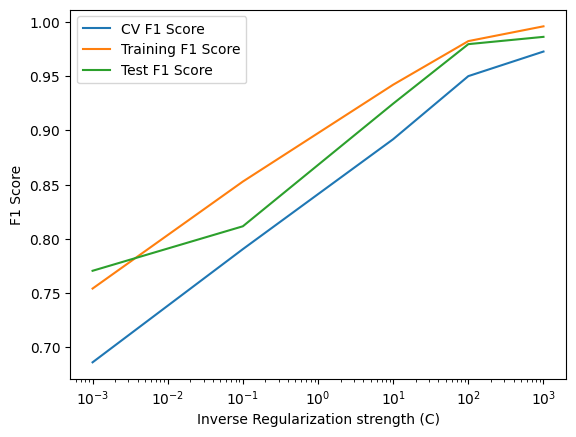

<Figure size 640x480 with 0 Axes>

In [180]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

c_values = [1e-3, 0.1, 10, 100, 1000]
train_f1_scores = []
test_f1_scores = []
cv_f1_scores = []

for c in c_values:
    print('C: {:.2f}'.format(c))
    lg = LogisticRegression(random_state=42, solver='newton-cg', C=c)
    scores = cross_val_score(lg, X_train, y_train, cv=5, scoring='f1_macro')
    cv_f1_scores.append(scores.mean())
    
    trained_lg = train_model(lg, X_train, y_train)
    y_train_pred = predict(trained_lg, X_train, y_train)
    _, _, _, f1_train = evaluate_model(y_train, y_train_pred)
    train_f1_scores.append(f1_train)

    y_test_pred = predict(trained_lg, X_test, y_test)
    _, _, _, f1_test = evaluate_model(y_test, y_test_pred)
    test_f1_scores.append(f1_test)

plt.plot(c_values, cv_f1_scores, label='CV F1 Score')
plt.plot(c_values, train_f1_scores, label='Training F1 Score')
plt.plot(c_values, test_f1_scores, label='Test F1 Score')
plt.xscale('log')
plt.xlabel('Inverse Regularization strength (C)')
plt.ylabel('F1 Score')
plt.legend()
plt.show()
plt.savefig('lg_normal_f1.png')

C: 0.00
C: 0.10
C: 10.00
C: 100.00
C: 1000.00


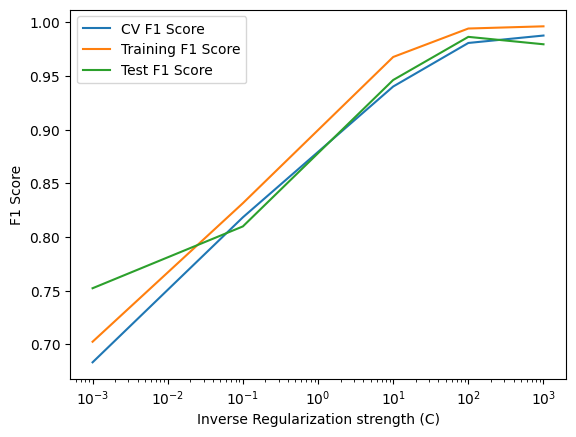

<Figure size 640x480 with 0 Axes>

In [181]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

c_values = [1e-3, 0.1, 10, 100, 1000]
train_f1_scores = []
test_f1_scores = []
cv_f1_scores = []

for c in c_values:
    print('C: {:.2f}'.format(c))
    lg = LogisticRegression(random_state=42, solver='newton-cg', C=c)
    scores = cross_val_score(lg, X_train_blsmote, y_train_blsmote, cv=5, scoring='f1_macro')
    cv_f1_scores.append(scores.mean())
    
    trained_lg = train_model(lg, X_train_blsmote, y_train_blsmote)
    y_train_pred = predict(trained_lg, X_train_blsmote, y_train_blsmote)
    _, _, _, f1_train = evaluate_model(y_train_blsmote, y_train_pred)
    train_f1_scores.append(f1_train)

    y_test_pred = predict(trained_lg, X_test, y_test)
    _, _, _, f1_test = evaluate_model(y_test, y_test_pred)
    test_f1_scores.append(f1_test)

plt.plot(c_values, cv_f1_scores, label='CV F1 Score')
plt.plot(c_values, train_f1_scores, label='Training F1 Score')
plt.plot(c_values, test_f1_scores, label='Test F1 Score')
plt.xscale('log')
plt.xlabel('Inverse Regularization strength (C)')
plt.ylabel('F1 Score')
plt.legend()
plt.show()
plt.savefig('lg_blsmote_f1.png')

C: 0.00
C: 0.10
C: 10.00
C: 100.00
C: 1000.00


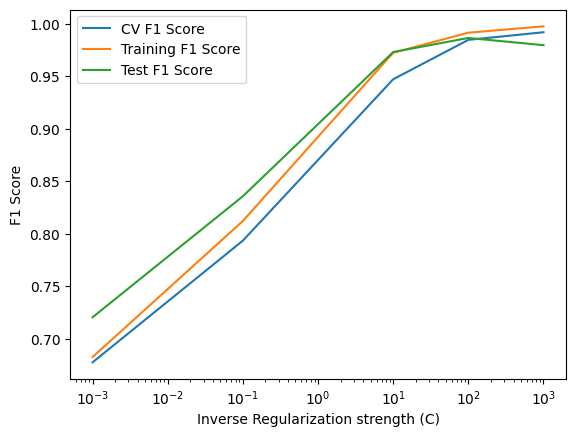

<Figure size 640x480 with 0 Axes>

In [186]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

c_values = [1e-3, 0.1, 10, 100, 1000]
train_f1_scores = []
test_f1_scores = []
cv_f1_scores = []

for c in c_values:
    print('C: {:.2f}'.format(c))
    lg = LogisticRegression(random_state=42, solver='newton-cg', C=c)
    scores = cross_val_score(lg, X_train_adasyn, y_train_adasyn, cv=5, scoring='f1_macro')
    cv_f1_scores.append(scores.mean())
    
    trained_lg = train_model(lg, X_train_adasyn, y_train_adasyn)
    y_train_pred = predict(trained_lg, X_train_adasyn, y_train_adasyn)
    _, _, _, f1_train = evaluate_model(y_train_adasyn, y_train_pred)
    train_f1_scores.append(f1_train)

    y_test_pred = predict(trained_lg, X_test, y_test)
    _, _, _, f1_test = evaluate_model(y_test, y_test_pred)
    test_f1_scores.append(f1_test)

plt.plot(c_values, cv_f1_scores, label='CV F1 Score')
plt.plot(c_values, train_f1_scores, label='Training F1 Score')
plt.plot(c_values, test_f1_scores, label='Test F1 Score')
plt.xscale('log')
plt.xlabel('Inverse Regularization strength (C)')
plt.ylabel('F1 Score')
plt.legend()
plt.show()
plt.savefig('lg_adasyn_f1.png')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

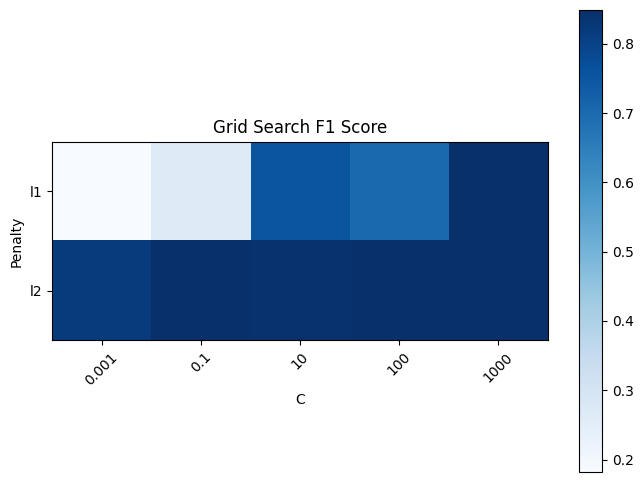

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e-3, 0.1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
lg = LogisticRegression(random_state=42, solver='liblinear')
grid_search = GridSearchCV(lg, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['penalty']), len(param_grid['C']))

plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('C')
plt.ylabel('Penalty')
plt.colorbar()
tick_marks_c = np.arange(len(param_grid['C']))
tick_marks_penalty = np.arange(len(param_grid['penalty']))
plt.xticks(tick_marks_c, param_grid['C'], rotation=45)
plt.yticks(tick_marks_penalty, param_grid['penalty'])
plt.title('Grid Search F1 Score')
plt.show()

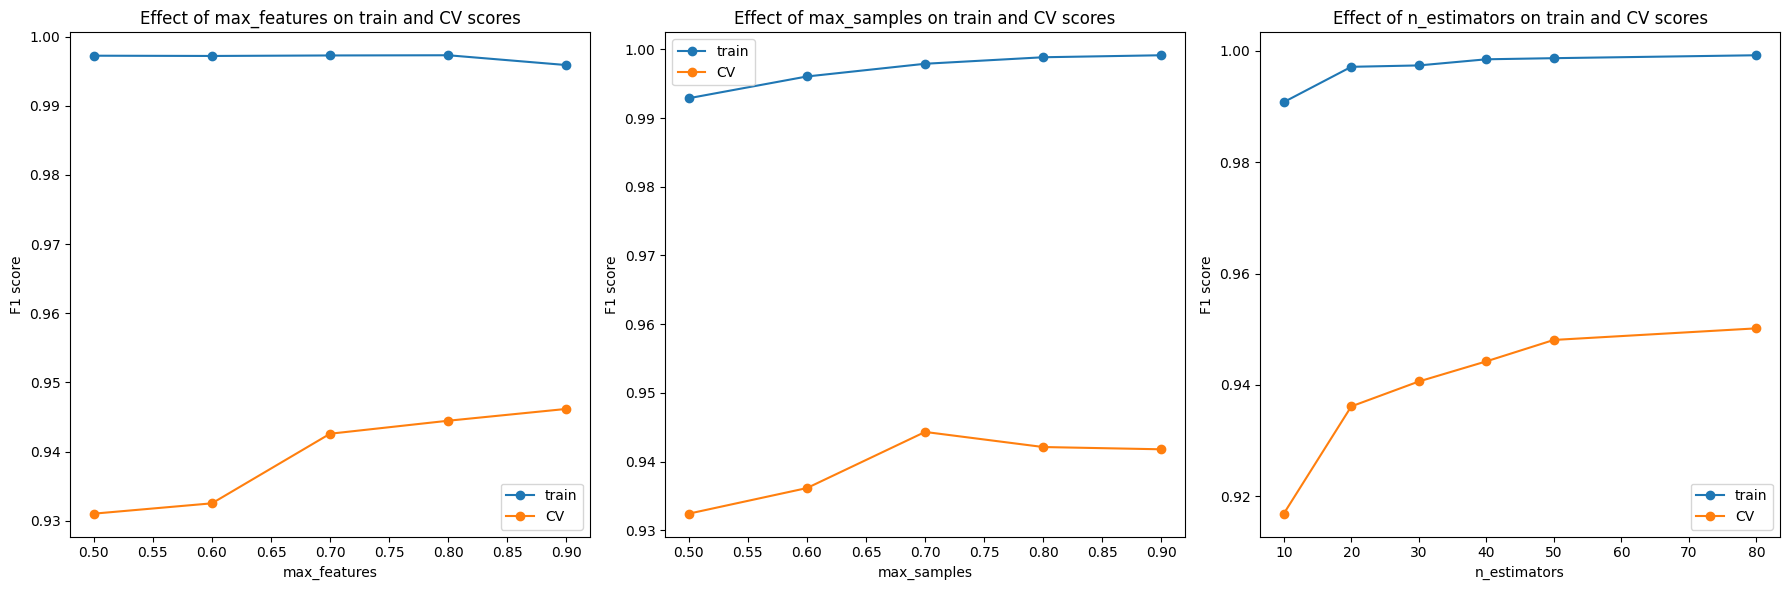

<Figure size 640x480 with 0 Axes>

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': [0.5, 0.6, 0.7, 0.8, 0.9], 'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9], 'n_estimators': [10, 20, 30, 40, 50,80]}
bg = BaggingClassifier(random_state=42)
grid_search = GridSearchCV(bg, param_grid=param_grid, cv=5, scoring='f1_macro', return_train_score=True)
grid_search.fit(X_train, y_train)

train_scores = grid_search.cv_results_['mean_train_score']
cv_scores = grid_search.cv_results_['mean_test_score']
train_scores = np.array(train_scores).reshape(len(param_grid['max_features']), len(param_grid['max_samples']), len(param_grid['n_estimators']))
cv_scores = np.array(cv_scores).reshape(len(param_grid['max_features']), len(param_grid['max_samples']), len(param_grid['n_estimators']))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# plot the effect of max_features on train and CV scores
axes[0].plot(param_grid['max_features'], train_scores.mean(axis=(1,2)), '-o', label='train')
axes[0].plot(param_grid['max_features'], cv_scores.mean(axis=(1,2)), '-o', label='CV')
axes[0].set_xlabel('max_features')
axes[0].set_ylabel('F1 score')
axes[0].set_title('Effect of max_features on train and CV scores')
axes[0].legend()

# plot the effect of max_samples on train and CV scores
axes[1].plot(param_grid['max_samples'], train_scores.mean(axis=(0,2)), '-o', label='train')
axes[1].plot(param_grid['max_samples'], cv_scores.mean(axis=(0,2)), '-o', label='CV')
axes[1].set_xlabel('max_samples')
axes[1].set_ylabel('F1 score')
axes[1].set_title('Effect of max_samples on train and CV scores')
axes[1].legend()

# plot the effect of n_estimators on train and CV scores
axes[2].plot(param_grid['n_estimators'], train_scores.mean(axis=(0,1)), '-o', label='train')
axes[2].plot(param_grid['n_estimators'], cv_scores.mean(axis=(0,1)), '-o', label='CV')
axes[2].set_xlabel('n_estimators')
axes[2].set_ylabel('F1 score')
axes[2].set_title('Effect of n_estimators on train and CV scores')
axes[2].legend()

plt.tight_layout()
plt.show()
plt.savefig('bg_normal_f1.png')

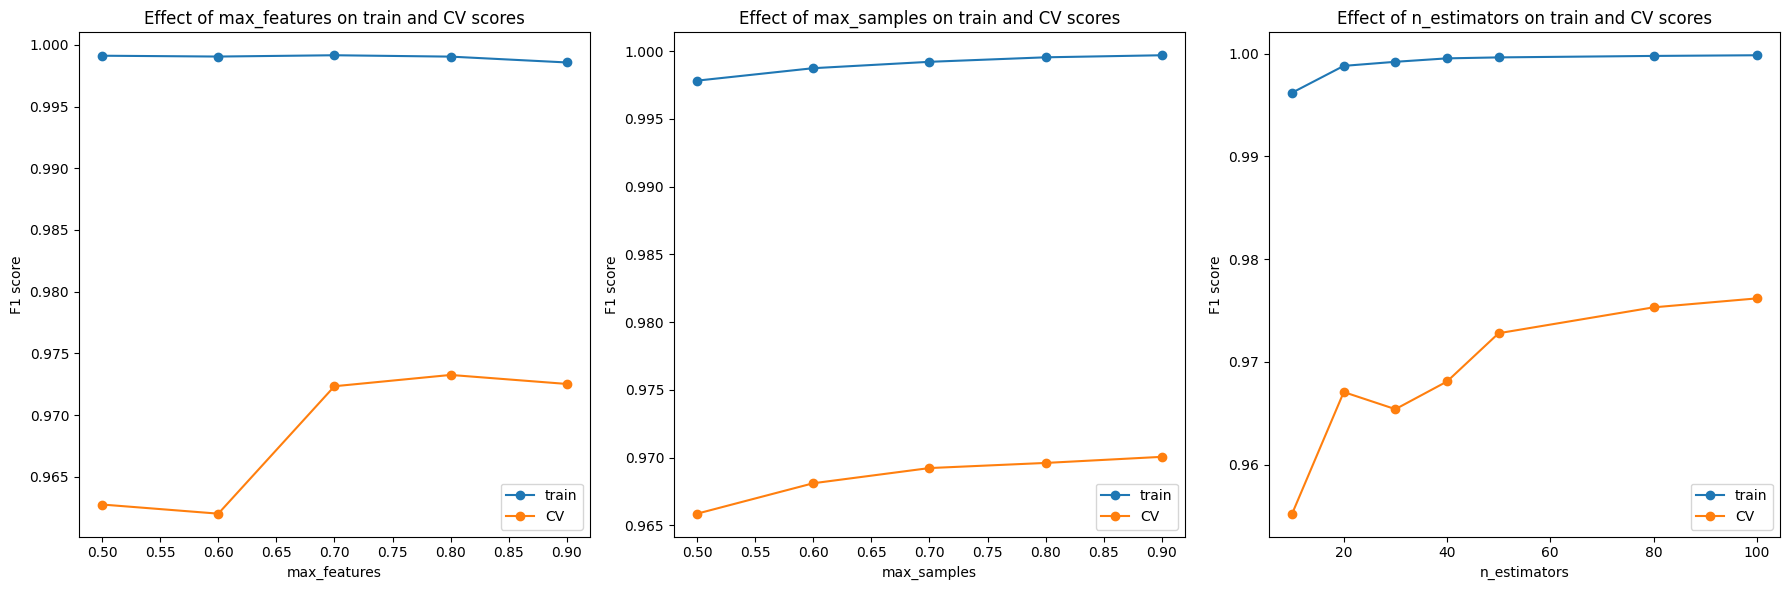

<Figure size 640x480 with 0 Axes>

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': [0.5, 0.6, 0.7, 0.8, 0.9], 'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9], 'n_estimators': [10, 20, 30, 40, 50,80,100]}
bg = BaggingClassifier(random_state=42)
grid_search = GridSearchCV(bg, param_grid=param_grid, cv=5, scoring='f1_macro', return_train_score=True)
grid_search.fit(X_train_blsmote, y_train_blsmote)

train_scores = grid_search.cv_results_['mean_train_score']
cv_scores = grid_search.cv_results_['mean_test_score']
train_scores = np.array(train_scores).reshape(len(param_grid['max_features']), len(param_grid['max_samples']), len(param_grid['n_estimators']))
cv_scores = np.array(cv_scores).reshape(len(param_grid['max_features']), len(param_grid['max_samples']), len(param_grid['n_estimators']))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# plot the effect of max_features on train and CV scores
axes[0].plot(param_grid['max_features'], train_scores.mean(axis=(1,2)), '-o', label='train')
axes[0].plot(param_grid['max_features'], cv_scores.mean(axis=(1,2)), '-o', label='CV')
axes[0].set_xlabel('max_features')
axes[0].set_ylabel('F1 score')
axes[0].set_title('Effect of max_features on train and CV scores')
axes[0].legend()

# plot the effect of max_samples on train and CV scores
axes[1].plot(param_grid['max_samples'], train_scores.mean(axis=(0,2)), '-o', label='train')
axes[1].plot(param_grid['max_samples'], cv_scores.mean(axis=(0,2)), '-o', label='CV')
axes[1].set_xlabel('max_samples')
axes[1].set_ylabel('F1 score')
axes[1].set_title('Effect of max_samples on train and CV scores')
axes[1].legend()

# plot the effect of n_estimators on train and CV scores
axes[2].plot(param_grid['n_estimators'], train_scores.mean(axis=(0,1)), '-o', label='train')
axes[2].plot(param_grid['n_estimators'], cv_scores.mean(axis=(0,1)), '-o', label='CV')
axes[2].set_xlabel('n_estimators')
axes[2].set_ylabel('F1 score')
axes[2].set_title('Effect of n_estimators on train and CV scores')
axes[2].legend()

plt.tight_layout()
plt.show()
plt.savefig('bg_blsmote_f1.png')

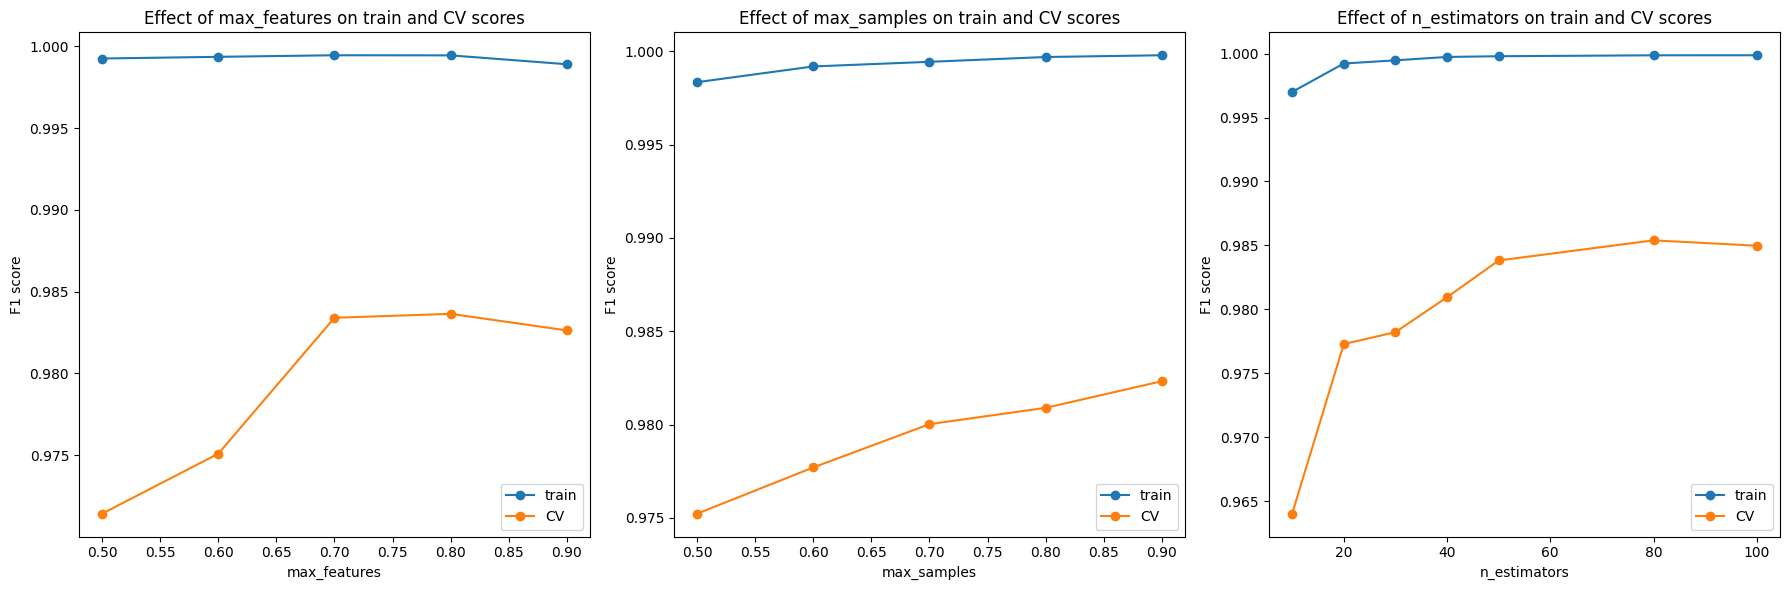

<Figure size 640x480 with 0 Axes>

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': [0.5, 0.6, 0.7, 0.8, 0.9], 'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9], 'n_estimators': [10, 20, 30, 40, 50,80,100]}
bg = BaggingClassifier(random_state=42)
grid_search = GridSearchCV(bg, param_grid=param_grid, cv=5, scoring='f1_macro', return_train_score=True)
grid_search.fit(X_train_adasyn, y_train_adasyn)

train_scores = grid_search.cv_results_['mean_train_score']
cv_scores = grid_search.cv_results_['mean_test_score']
train_scores = np.array(train_scores).reshape(len(param_grid['max_features']), len(param_grid['max_samples']), len(param_grid['n_estimators']))
cv_scores = np.array(cv_scores).reshape(len(param_grid['max_features']), len(param_grid['max_samples']), len(param_grid['n_estimators']))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# plot the effect of max_features on train and CV scores
axes[0].plot(param_grid['max_features'], train_scores.mean(axis=(1,2)), '-o', label='train')
axes[0].plot(param_grid['max_features'], cv_scores.mean(axis=(1,2)), '-o', label='CV')
axes[0].set_xlabel('max_features')
axes[0].set_ylabel('F1 score')
axes[0].set_title('Effect of max_features on train and CV scores')
axes[0].legend()

# plot the effect of max_samples on train and CV scores
axes[1].plot(param_grid['max_samples'], train_scores.mean(axis=(0,2)), '-o', label='train')
axes[1].plot(param_grid['max_samples'], cv_scores.mean(axis=(0,2)), '-o', label='CV')
axes[1].set_xlabel('max_samples')
axes[1].set_ylabel('F1 score')
axes[1].set_title('Effect of max_samples on train and CV scores')
axes[1].legend()

# plot the effect of n_estimators on train and CV scores
axes[2].plot(param_grid['n_estimators'], train_scores.mean(axis=(0,1)), '-o', label='train')
axes[2].plot(param_grid['n_estimators'], cv_scores.mean(axis=(0,1)), '-o', label='CV')
axes[2].set_xlabel('n_estimators')
axes[2].set_ylabel('F1 score')
axes[2].set_title('Effect of n_estimators on train and CV scores')
axes[2].legend()

plt.tight_layout()
plt.show()
plt.savefig('bg_blsmote_f1.png')